In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt #used to avoid a warning message

In [3]:
import pandas as pd
import csv
import os

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0]
        rankNum=int(row[1])

In [4]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
       "_total_inventories_","_total_in_progress_inventories_",
       "_total_lost_production_","_total_cost_of_lost_production_"]

In [5]:
os.chdir(fileNameRoot)
# database
data={}
for name in names:
    data[name]=[]
    for k in range(rankNum):
        data[name].append(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

    data[name].append(data[name][0].copy()) #copy of first rank
    for k in range(1,rankNum):   #add others
        data[name][-1]=data[name][-1].add(data[name][k])

'_total_production_, all ranks'

,0,1,2
0,19.243474,20.184697,7.071822
1,35.855034,31.438770,2.113474
2,48.934239,44.313833,0.728565
3,60.813614,52.264614,0.336578
4,60.813614,56.619259,0.381658
...,...,...,...
95,42.877515,40.851942,1.158058
96,48.008655,33.515267,0.376543
97,48.008655,45.496391,0.165771
98,52.346359,49.373307,3.123372


'____________________________________________________________'

'_total_cost_of_production_, all ranks'

,0,1,2
0,37.5,36.0,19.95
1,69.0,57.6,4.20
2,94.5,81.6,2.10
3,117.0,96.0,1.05
4,117.0,104.4,3.15
...,...,...,...
95,85.5,76.8,2.10
96,94.5,80.4,1.05
97,94.5,93.6,2.10
98,102.0,92.4,7.35


'____________________________________________________________'

'_total_cost_of_unused_factors_, all ranks'

,0,1,2
0,114.836772,118.455266,44.841262
1,83.336772,96.855266,60.591262
2,57.836772,72.855266,62.691262
3,35.336772,58.455266,63.741262
4,35.336772,50.055266,61.641262
...,...,...,...
95,66.836772,77.655266,62.691262
96,57.836772,74.055266,63.741262
97,57.836772,60.855266,62.691262
98,50.336772,62.055266,57.441262


'____________________________________________________________'

'_total_inventories_, all ranks'

,0,1,2
0,0.0,0.0,13.65
1,0.0,0.0,17.85
2,0.0,43.2,19.95
3,0.0,172.8,21.00
4,187.5,244.8,22.05
...,...,...,...
95,6765.0,7930.8,459.90
96,6765.0,7930.8,460.95
97,6892.5,7977.6,463.05
98,7042.5,8044.8,470.40


'____________________________________________________________'

'_total_in_progress_inventories_, all ranks'

,0,1,2
0,37.5,36.0,0.0
1,106.5,93.6,0.0
2,201.0,132.0,0.0
3,318.0,98.4,0.0
4,247.5,130.8,0.0
...,...,...,...
95,138.0,69.6,0.0
96,232.5,114.0,0.0
97,199.5,122.4,0.0
98,151.5,147.6,0.0


'____________________________________________________________'

'_total_lost_production_, all ranks'

,0,1,2
0,0.0,0.000000,3.317398
1,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000
3,0.0,0.000000,0.000000
4,0.0,0.000000,0.728623
...,...,...,...
95,0.0,0.000000,0.000000
96,0.0,20.569214,0.000000
97,0.0,20.275691,0.000000
98,0.0,0.000000,0.000000


'____________________________________________________________'

'_total_cost_of_lost_production_, all ranks'

,0,1,2
0,0.0,0.0,6.30
1,0.0,0.0,0.00
2,0.0,0.0,0.00
3,0.0,0.0,0.00
4,0.0,0.0,2.10
...,...,...,...
95,0.0,0.0,0.00
96,0.0,36.0,0.00
97,0.0,38.4,0.00
98,0.0,0.0,0.00


'____________________________________________________________'

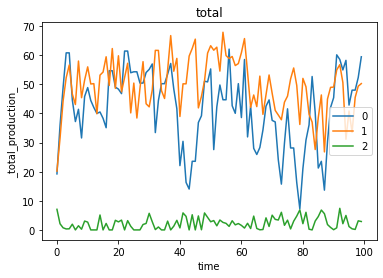

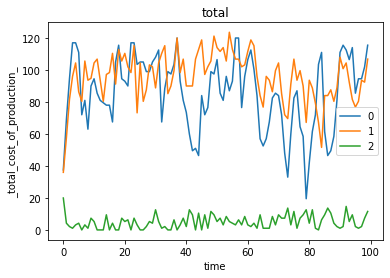

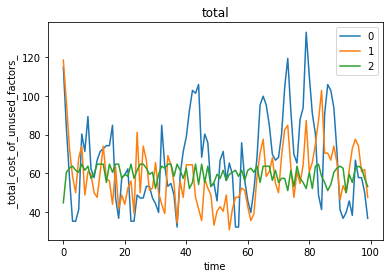

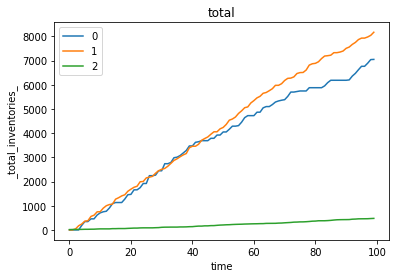

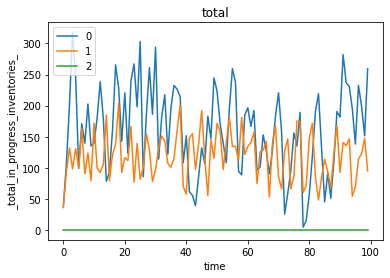

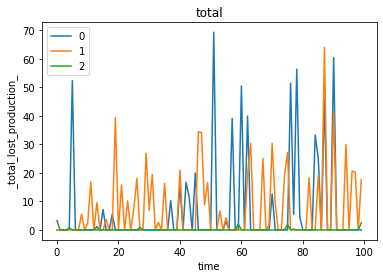

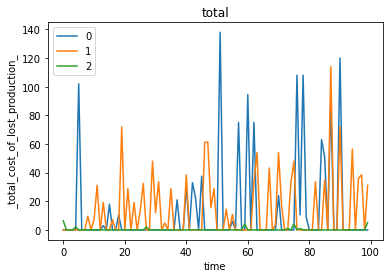

In [6]:
# totals
with plt.rc_context(rc={'figure.max_open_warning': 0}): #to avoid a warning about open plots
    for name in names:
        display(name+", all ranks")
        display(data[name][-1])
        display("____________________________________________________________")
        data[name][-1].plot(title="total",xlabel="time",ylabel=name)